In [1]:
# read in binary data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys, os
sys.path.append(os.environ['raco'])
from common import dotdict, g_univ, buff_line
from scipy.integrate import simpson
f = open("Model_S.pkl", "rb")
di = dotdict(pickle.load(f))
f.close()

In [2]:
di.msun

1.989e+33

In [3]:
# all right let's plot some diffusion coefficients

In [4]:
plt.plot(di.rr, di.nu)
plt.ylabel('viscosity')
plt.ylim(0,6)

(0.0, 6.0)

In [5]:
plt.plot(di.rr, di.kappa)
plt.ylim(1e3, 1e8)
plt.ylabel('k_rad')
plt.yscale('log')

In [6]:
plt.plot(di.rr, di.eta)
plt.ylabel('eta')
plt.yscale('log')

In [7]:
# see what they all look like on same scale
plt.plot(di.rr, di.nu)
plt.plot(di.rr, di.kappa)
plt.plot(di.rr, di.eta)
plt.ylim(0.1,1e8)
plt.yscale('log')

In [8]:
# plot Prandtl numbers
plt.plot(di.rr, di.pr, label='Pr')
plt.plot(di.rr, di.prm, label='Pr_m')
plt.plot(di.rr, di.pr/di.prm, label='Pr/Pr_m = eta/kappa')
plt.legend()
plt.ylim(1e-8, 100)
plt.yscale('log')

In [9]:
# plot opacity
plt.plot(di.rr, di.opa)
plt.yscale('log')
plt.ylim(1, 1e6)

(1, 1000000.0)

In [10]:
# plot opacity
plt.plot(di.rr, di.c_p)
plt.ylim(2e8,4e8)

(200000000.0, 400000000.0)

In [11]:
# let's make nice plot of diffusions and Prandtl numbers
fig, axs = plt.subplots(1, 2, figsize=(8.5, 4.))
axs = axs.flatten()
ax1, ax2 = axs
#ax1, ax2, ax3, ax4 = axs

# plot the diffusivities
ax1.plot(di.rr, di.nu, label=r'$\nu\sim T^{5/2}\rho^{-1}$')
ax1.plot(di.rr, di.kappa, label=r'$\kappa\sim T^3\rho^{-2}c_p^{-1}\chi^{-1}$')
ax1.plot(di.rr, di.eta, label=r'$\eta\sim T^{-3/2}$')
ax1.legend(loc='lower left')

# set y limits and scaling
y1, y2 = 1e-4, 1e8
ax1.set_ylim(y1, y2)
ax1.set_yscale('log')
ax1.set_ylabel('diffusivity ' + r'$\rm{[cm^2\ s^{-1}]}$')

# plot the Prandtl numbers
ax2.plot(di.rr, di.pr, label=r'$\nu/\kappa\sim \rho c_p\chi T^{-1/2}$')
ax2.plot(di.rr, di.prm, label=r'$\nu/\eta\sim T^4\rho^{-1}$')
ax2.plot(di.rr, di.pr/di.prm, label=r'$\eta/\kappa\sim\rho^2c_p\chi T^{-9/2}$')
ax2.plot(di.rr, di.sigma, label=r'$\sigma$')

ax2.legend(loc='lower left')

# set y limits and scaling
y1, y2 = 1e-8, 1e1
ax2.set_ylim(y1, y2)
ax2.set_yscale('log')
ax2.set_ylabel('Prandtl numbers')

# mark some values for the top row:
for ax in [ax1, ax2]:
    npoints = 100
    y1, y2 = ax.get_ylim()
    yvals = np.linspace(y1, y2, npoints)

    # plot base of CZ and cut radius
    for rval in [di.rbcz, di.rcut]:
        ax.plot(rval + np.zeros(npoints), yvals, 'k--')


    # shade the non-ideal layer
    ax.fill_between(di.rr[:di.ircut], di.rr[:di.ircut]*0 + y1, di.rr[:di.ircut]*0 + y2, fc="k", alpha=0.2)

    # shade the tachocline
    ax.fill_between(di.rr[di.irtach2:di.irtach1], di.rr[di.irtach2:di.irtach1]*0 + y1,\
                     di.rr[di.irtach2:di.irtach1]*0 + y2, fc="k", alpha=0.2)

    # set x limits
    ax.set_xlim(0, di.rsun)

    # set x label 
    ax.set_xlabel('r [cm]')

for ax in axs:
    plt.sca(ax)
    plt.minorticks_on()
    plt.tick_params(top=True, right=True, direction='in', which='both')
    plt.ticklabel_format(useMathText=True, axis='x', scilimits=(0,0)    )

plt.tight_layout()

plt.savefig('plots/Model_S_diffusions.png', dpi=300)

In [12]:
print("nu tach = %1.3e" %di.nu[di.irtach])
print("kappa tach = %1.3e" %di.kappa[di.irtach])
print("eta tach = %1.3e" %di.eta[di.irtach])

print("delta nu tach = %.3f" %np.abs((di.nu[di.irtach1] - di.nu[di.irtach2])/di.nu[di.irtach]))
print("delta kappa tach = %.3f" %np.abs((di.kappa[di.irtach1] - di.kappa[di.irtach2])/di.kappa[di.irtach]))
print("delta eta tach = %.3f" %np.abs((di.eta[di.irtach1] - di.eta[di.irtach2])/di.eta[di.irtach]))

nu tach = 2.740e+01
kappa tach = 1.416e+07
eta tach = 3.939e+02
delta nu tach = 0.105
delta kappa tach = 0.089
delta eta tach = 0.302


In [13]:
# cool...things don't really vary across tachocline
print ("nu/kappa tach = %1.3e" %di.pr[di.irtach])
print ("nu/eta tach = %1.3e" %di.prm[di.irtach])
print ("eta/kappa tach = %1.3e" %(di.pr/di.prm)[di.irtach])

nu/kappa tach = 1.935e-06
nu/eta tach = 6.955e-02
eta/kappa tach = 2.782e-05


In [14]:
# curious: look at arguments to various "skin approximations" vs. fanciness
arg1 = (di.rbcz - di.reta)/np.sqrt(di.etaconst)
arg2 = (di.rbcz - di.rrrz)/np.sqrt(di.eta[di.irbcz:])
arg3 = (di.rbcz - di.rrrz)/np.sqrt(di.etaconst)
plt.figure()
plt.plot(di.rrrz, arg1, label="r_eta")
plt.plot(di.rrrz, arg2, label="varying eta(r)")
plt.plot(di.rrrz, arg3, label="eta_const, regular r")
plt.legend()

In [15]:
# Okay, I'm convinced it makes a difference. 

# should probably compute similar length-scales (and constant values)
# for viscous spread and radiative spread
nurz = di.nu[di.irbcz:]
kapparz = di.kappa[di.irbcz:]
etarz = di.eta[di.irbcz:]
nsqrz = np.abs(di.nsq[di.irbcz:]) # dunno why some vals are negative; resvisit later
omegarz = 2.7e-6

# compute r nu
integrand = 1./np.sqrt(nurz)
di.rnu = np.zeros(di.nrrz)
for ir in range(di.nrrz):
    di.rnu[ir] = -simpson(integrand[ir:], x=di.rrrz[ir:])
di.nuconst = (di.rbcz/di.rnu[0])**2
di.rnu *= di.rbcz/di.rnu[0] # normalize by top value (full integral)
di.irnuconst =  np.argmin(np.abs(nurz - di.nuconst))
di.rnuconst = di.rrrz[di.irnuconst]
di.irnuconst += di.irbcz

# compute r ES
di.es = nsqrz/(2*omegarz)**2/di.rrrz**2/kapparz # eddington-Sweet (rad. spread) coefficient
integrand = di.es**0.25 # needs to be to the (1/4) now
di.res = np.zeros(di.nrrz)
for ir in range(di.nrrz):
    di.res[ir] = -simpson(integrand[ir:], x=di.rrrz[ir:])
di.esconst = (di.res[0]/di.rbcz)**4
di.res *= di.rbcz/di.res[0] # normalize by top value (full integral)
di.iresconst =  np.argmin(np.abs(di.es - di.esconst))
di.resconst = di.rrrz[di.iresconst]
di.iresconst += di.irbcz

# compute const eddington sweet time
di.tesconst = di.rbcz**4/di.esconst

#plt.figure()
#plt.plot(di.rrrz, di.reta)

print("eta_const:", di.etaconst)
print("r_etaconst/rbcz", di.retaconst/di.rbcz)

print(buff_line)

print("nu_const:", di.nuconst)
print("r_nuconst/rbcz", di.rnuconst/di.rbcz)

print(buff_line)

print("es_const:", di.esconst)
print("r_esconst/rbcz", di.resconst/di.rbcz)

print(buff_line)
yr = 365*86400
print("t_ES const = %1.3e yr" %(di.tesconst/yr) )

eta_const: 66.46942480163796
r_etaconst/rbcz 0.41098522563775813
nu_const: 10.045066439516416
r_nuconst/rbcz 0.523452038588161
es_const: 1.6177907320298581e-21
r_esconst/rbcz 0.37245465003141753
t_ES const = 1.187e+56 yr


In [16]:
# this is a much bigger Eddington-Sweet time...huh. Plot time to spread though
# look at res now
plt.close()
plt.figure()
plt.plot(di.rrrz, di.res)

In [17]:
tes_vsr = (di.rbcz - di.res)**4 / di.es
tnu_vsr = (di.rbcz - di.rnu)**2 / nurz
teta_vsr = (di.rbcz - di.reta)**2 / etarz

plt.figure()
plt.plot(tes_vsr/yr, di.rbcz-di.rrrz, label="rad. spread")
plt.plot(tnu_vsr/yr, di.rbcz-di.rrrz, label="visc. spread")
plt.plot(teta_vsr/yr, di.rbcz-di.rrrz, label="mag. spread")
plt.legend()
plt.xlim(0,4.6e9)
plt.ylim(0,2e10)
#plt.yscale('log')

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_32630/427923866.py:1: RuntimeWarning: divide by zero encountered in divide
  tes_vsr = (di.rbcz - di.res)**4 / di.es


(0.0, 20000000000.0)

In [18]:
tes_vsr = (di.rbcz - di.res)**4 / di.es
tnu_vsr = (di.rbcz - di.rnu)**2 / nurz
teta_vsr = (di.rbcz - di.reta)**2 / etarz

plt.figure()
plt.plot(tes_vsr/yr, di.rbcz-di.rrrz, label="rad. spread")
plt.plot(tnu_vsr/yr, di.rbcz-di.rrrz, label="visc. spread")
plt.plot(teta_vsr/yr, di.rbcz-di.rrrz, label="mag. spread")
plt.legend()
plt.xlim(0,0.5e7)
plt.ylim(0,2e10)
#plt.yscale('log')

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_32630/3934090357.py:1: RuntimeWarning: divide by zero encountered in divide
  tes_vsr = (di.rbcz - di.res)**4 / di.es


(0.0, 20000000000.0)

In [19]:
# estimate tachocline torque from rad spread
rsun = 6.96e10
gamma = 0.05*rsun
domdt_rad = di.es[2]*omegarz/gamma**4
vtheta = 1000. # 10 m/s
domdt_mc = 0.3*omegarz*vtheta/(np.pi/2*rsun)

In [20]:
domdt_rad

5.38615967144342e-69

In [21]:
domdt_mc

7.408937006002024e-15

In [22]:
di.nrrz

1043

In [23]:
rsun**4/di.es[2]/yr/1e11

2.5433019020238673e+49

In [24]:
plt.figure()
plt.plot(di.rrrz, di.es)

In [25]:
# no idea what's going on: plot

plt.figure()
plt.xlim(2e10, 5e10)
plt.ylim(0, 1e-21)
plt.plot(di.rrrz, nsqrz/(2*omegarz)**2/di.rrrz**2/kapparz)

In [26]:
plt.figure()
plt.plot(di.rrrz, nsqrz)

In [27]:
plt.figure()
plt.plot(di.rrrz, kapparz)

In [28]:
# just plot sigma by itself

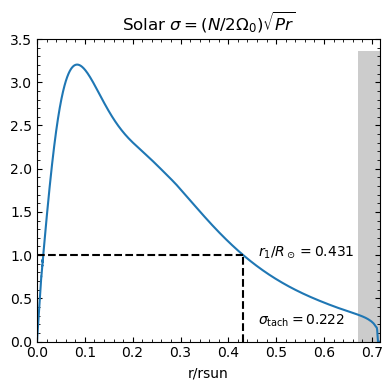

In [34]:
plt.close()
# let's make nice plot of diffusions and Prandtl numbers
fig, ax = plt.subplots(1, 1, figsize=(4., 4.))
#ax = axs[0,0]

# plot the diffusivities
ax.plot(di.rr/rsun, di.sigma,label='\sigma')
ax.plot(di.rr/rsun, np.sqrt(di.pr/di.pr[di.irtach2]), label=r'$\sqrt{Pr/Pr_0}$')

# plot the change in Prandtl number

# mark the tachocline
npoints = 100
y1, y2 = ax.get_ylim()
yvals = np.linspace(y1, y2, npoints)

# plot base of CZ and cut radius
ax.plot(rval + np.zeros(npoints), yvals, 'k--')



# shade the tachocline
ax.fill_between(di.rr[di.irtach2:di.irtach1]/rsun, di.rr[di.irtach2:di.irtach1]*0 + y1,\
                 di.rr[di.irtach2:di.irtach1]*0 + y2, fc="k", alpha=0.2)

# set x limits
ax.set_xlim(0, di.rtach2/rsun)
ymin, ymax = 0, 3.5
ax.set_ylim(ymin, ymax)
# set x label 
ax.set_xlabel('r/rsun')

# find and mark where sigma = 1
yrange = np.linspace(ymin, 1, 100)
ir1 = np.argmin(np.abs(di.sigma -1.))
r1 = di.rr[ir1]/rsun
plt.plot(r1 + np.zeros(100), yrange, 'k--')
xrange = np.linspace(0, r1, 100)
plt.plot(xrange, np.ones(100), 'k--')
ax.text(r1+0.03, 1., r'$r_1/R_\odot=%0.3f$' %r1)

# label sigma near the tachocline
sigma_tach = simpson((di.sigma*di.rr**2)[di.irtach2:di.irtach1+1], x=di.rr[di.irtach2:di.irtach1+1])
sigma_tach /= simpson((di.rr**2)[di.irtach2:di.irtach1+1], x=di.rr[di.irtach2:di.irtach1+1])
ax.text(r1+ 0.03, 0.2, r'$\sigma_{\rm tach}=%0.3f$' %sigma_tach)
plt.sca(ax)
plt.minorticks_on()
plt.tick_params(top=True, right=True, direction='in', which='both')
#plt.ticklabel_format(useMathText=True, axis='x', scilimits=(0,0)    )

plt.title('Solar ' + r'$\sigma = (N/2\Omega_0) \sqrt{Pr}$')
plt.tight_layout()

plt.savefig('plots/Model_S_sigma.png', dpi=300)
plt.show()

In [30]:
sigma_tach

0.22234524243765955

In [31]:
r1

0.4313022237068965

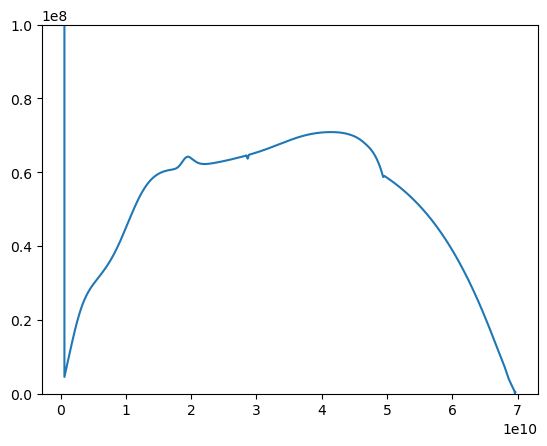

In [32]:
plt.close()
plt.plot(di.rr[:-1], -np.diff(di.rr))
plt.ylim(0,1e8)
plt.show()

In [33]:
simpson

<function scipy.integrate._quadrature.simpson(y, *, x=None, dx=1.0, axis=-1, even=<object object at 0x7f80a848cd20>)>